# Purchase amount prediction model

## Evironment Set Up

In [1]:
import sys
import os

# Add project root to sys.path for easy imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.feature_engineering import FeatureEngineering
from src.visualisation_tools import Visualisation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Load the data set
df = pd.read_csv('../data/customer_data.csv')


## Data Processing

### Handling Outliers

In [4]:

# Detect outliers for purchase_amount
outliers, purchase_amount_lower_bound, purchase_amount_upper_bound = FeatureEngineering.identify_outliers(df, 'purchase_amount')

# Cap the outliers at the upper bound
df.loc[(df['purchase_amount'] > purchase_amount_upper_bound), 'purchase_amount'] = int(purchase_amount_upper_bound)


## Split the Dataset

In [5]:
X = df[['income']]
y = df['purchase_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 2337297.247456583
Mean Absolute Error: 1104.7002729827261
R² Score: 0.898043074037824


R² Score is good as 89.8% of the variance in purchase amount is explained by the model.

Mean Absolute Error looks high but compare to the mean of 'purchase_amount', 9,634.79, the MAE is about 11.5% which is not perfect but good estimate.

Mean Squared Error is used to compare performances of different models. To reduce this adding additional features might be helpful.

## Visualise the Model

In [8]:
# Compress data to dataframe

df_puchase_amount_income_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

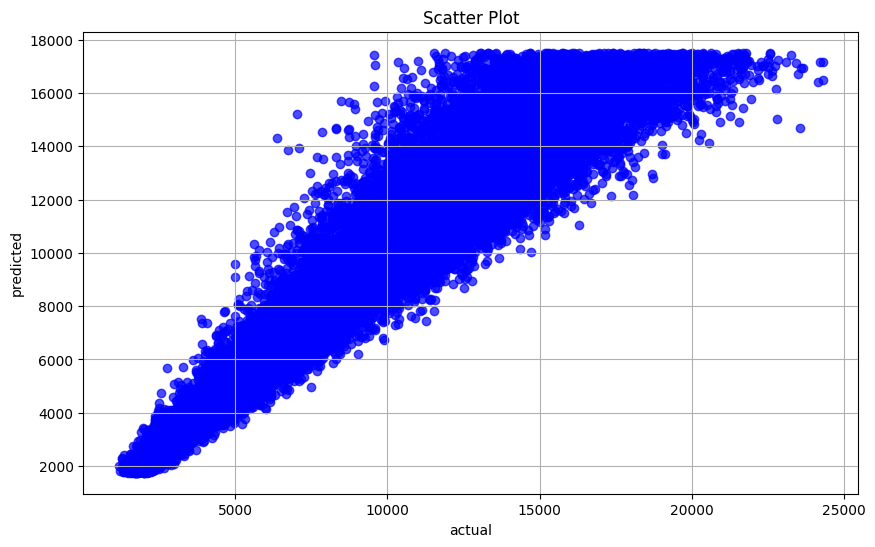

In [9]:
Visualisation.create_scatter_plot(df_puchase_amount_income_prediction, 'actual', 'predicted')

# Ploynomial Regression Model

In [10]:
poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, LinearRegression())

model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## Evaluate the Model

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 2337272.595640726
Mean Absolute Error: 1104.7043834923188
R² Score: 0.8980441493924316


The result of polynomial regression model shows lower MSE than the one of linear regression model.

## Visualise the Model

In [12]:
# Compress data to dataframe

df_puchase_amount_income_prediction_polynomial = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

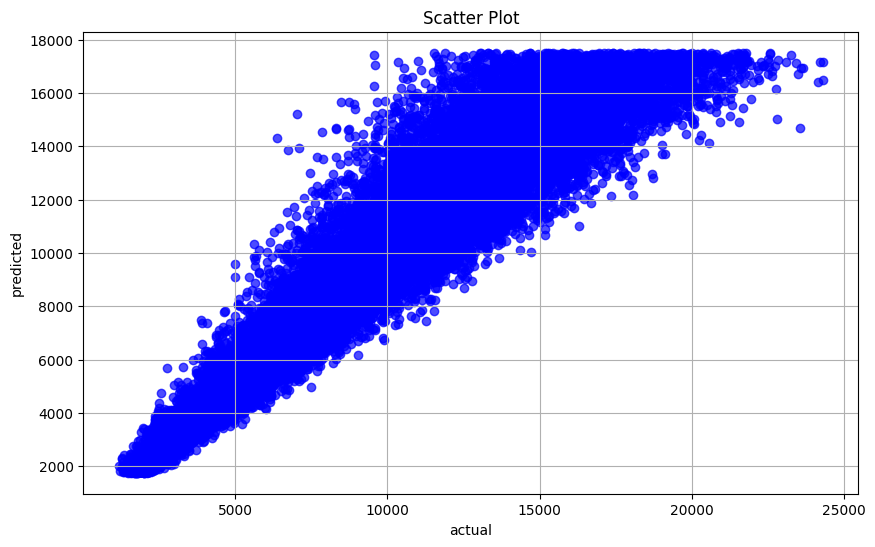

In [13]:
Visualisation.create_scatter_plot(df_puchase_amount_income_prediction_polynomial, 'actual', 'predicted')

# Descision Tree

In [14]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

## Evaluate the Model

In [15]:
# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 2361897.4204908926
Mean Absolute Error: 1114.160537113369
R² Score: 0.896969972179066


The result is worse than the one of Polynomial regression model.

## Visualise the Model

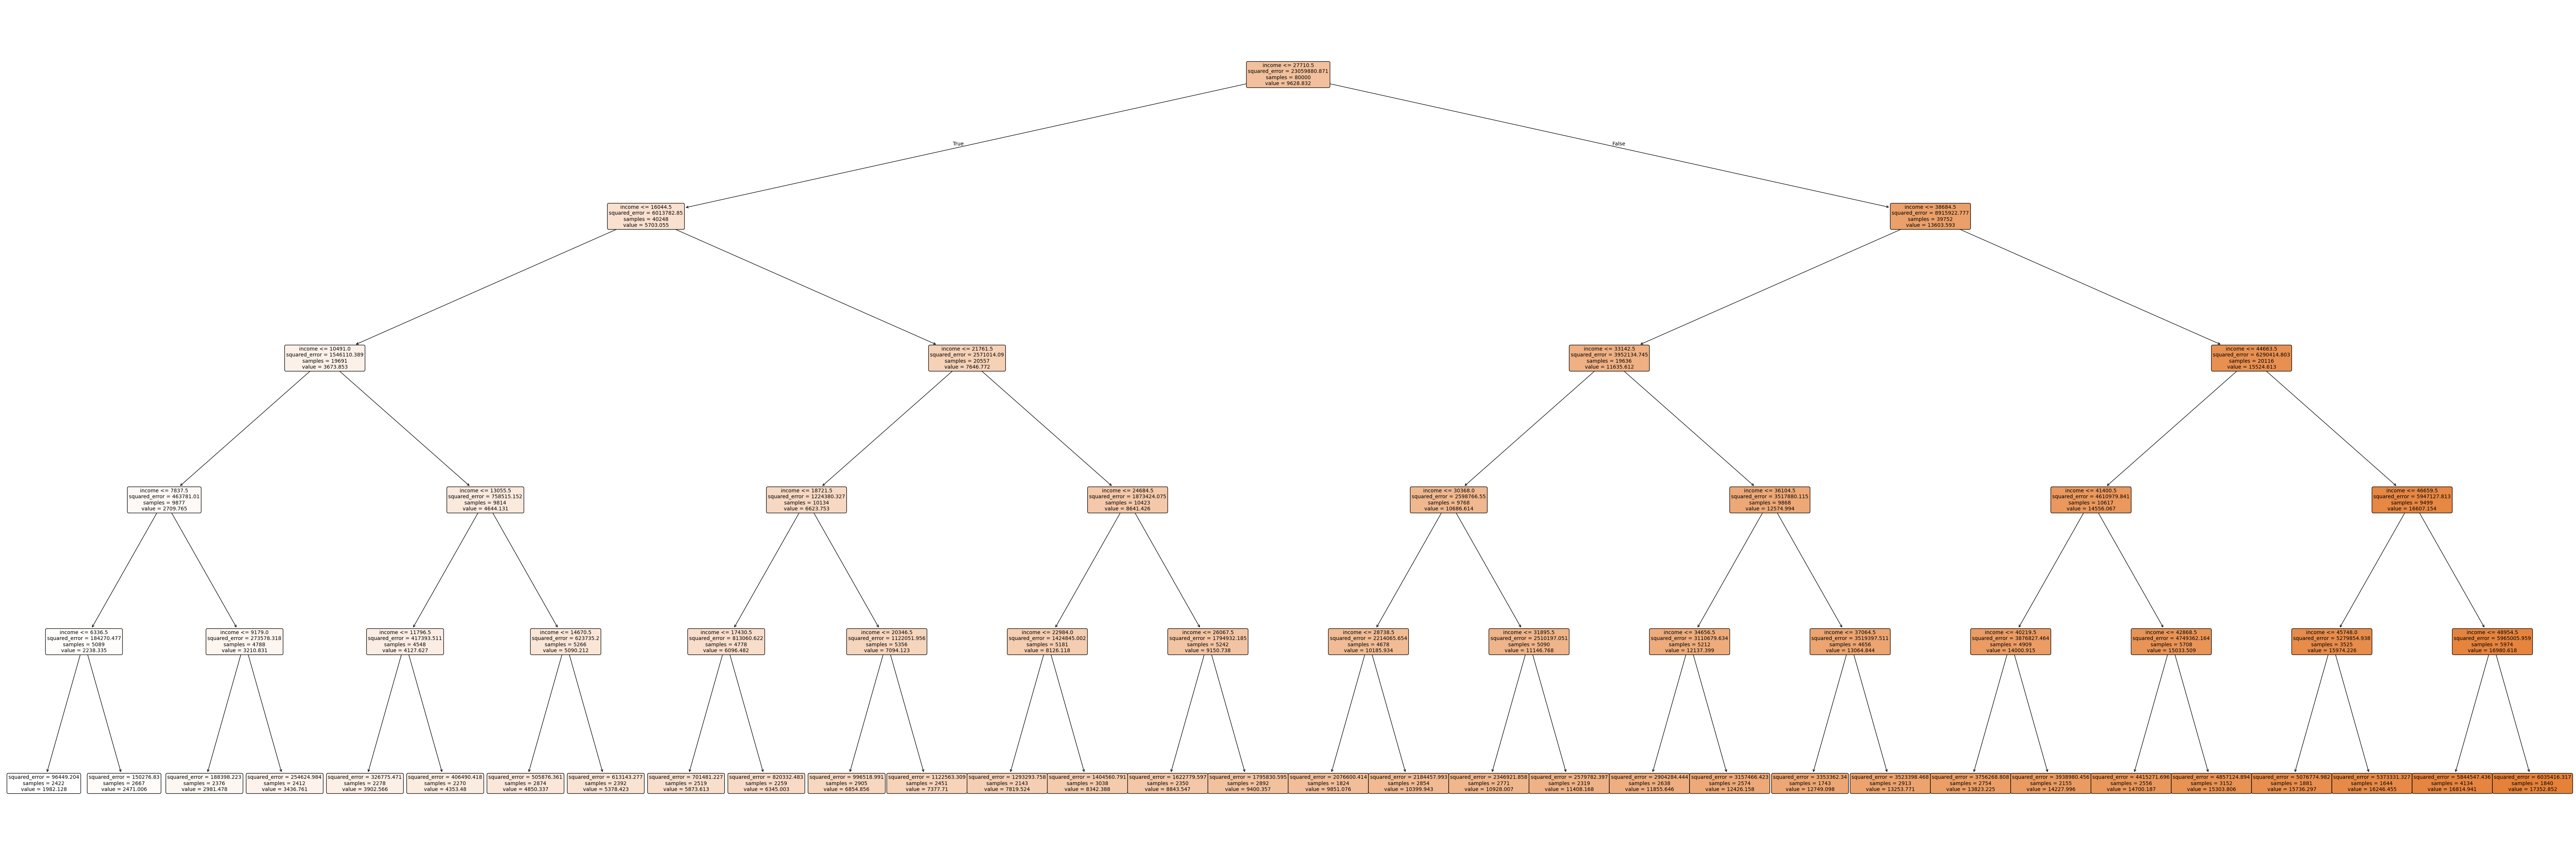

In [16]:
# Plot the tree
plt.figure(figsize=(90, 30))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# Random Forest

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate the Model

In [18]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 3237782.4104110613
Mean Absolute Error: 1295.7734355432033
R² Score: 0.8587623624427136


# Conclusion

Overall performance is the best with the polynomial regression model.